# ReLU-base ensemble with categorical entity embedding
- ReLu activation, 4 layers, 100 neurons per layer
- PRI_jet_num embedded
- Events fixed to common alignment (data fixing)
- Validation score use ensemble of 10 models weighted by loss

### Import modules

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from __future__ import division
import sys
import os
sys.path.append('../../')
from modules.basics import *

/home/giles/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
NAME = '3_relu_ensemble_embed_fix'

In [3]:
experiment = Experiment(NAME, 'helios_cuda', RESULTS_PATH)

In [4]:
!python ../../modules/data_import.py -d ../../data/ -f PRI_jet_num -r True -y True -z True -s {experiment.seed}

/home/giles/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Setting PRI_lep to phi = 0
Setting PRI_tau to positve phi
Setting PRI_lep to positive eta
eta component of PRI_met not found
Converting to use_cartesian coordinates
Setting PRI_lep to phi = 0
Setting PRI_tau to positve phi
Setting PRI_lep to positive eta
eta component of PRI_met not found
Converting to use_cartesian coordinates
Training on 200000 datapoints and validating on 50000, using 30 feats:
['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_sumet'

## Training

### Import data

In [5]:
train_fy = FoldYielder(DATA_PATH/'train.hdf5')

### Options

In [6]:
n_models = 10
patience = 50
max_epochs = 200
ensemble_size = 10

bs = 256
objective = 'classification'
model_args = {'body':{'act':'relu', 'width':100, 'depth':4}}
opt_args = {'opt':'adam', 'eps':1e-08}
cat_embedder = CatEmbedder.from_fy(train_fy, emb_szs=[3])

n_out = 1
model_builder = ModelBuilder(objective, cont_feats=train_fy.cont_feats, n_out=n_out, cat_embedder=cat_embedder,
                             model_args=model_args, opt_args=opt_args)
Model(model_builder)

Inputs:
29 Continuous: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_sumet', 'PRI_jet_all_pt', 'PRI_met_px', 'PRI_met_py', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_met_pt']
                   
1  Categorical: ['PRI_jet_num']
                   
0  Matrix elements: []
                   

Model:
<bound method Module.parameters of Sequential(
  (0): CatEmbHead(
    (embeds): ModuleList(
      (0): Embedding(4, 3)
    )
  )
  (1): FullyConnected(
    (layers): Sequential(
      (0): Sequential(
        (0): Linear(in_features=32, out_features=100, bias=True)
        (1): ReLU()
      )
   

### Determine LR

LR finder took 2.577s 


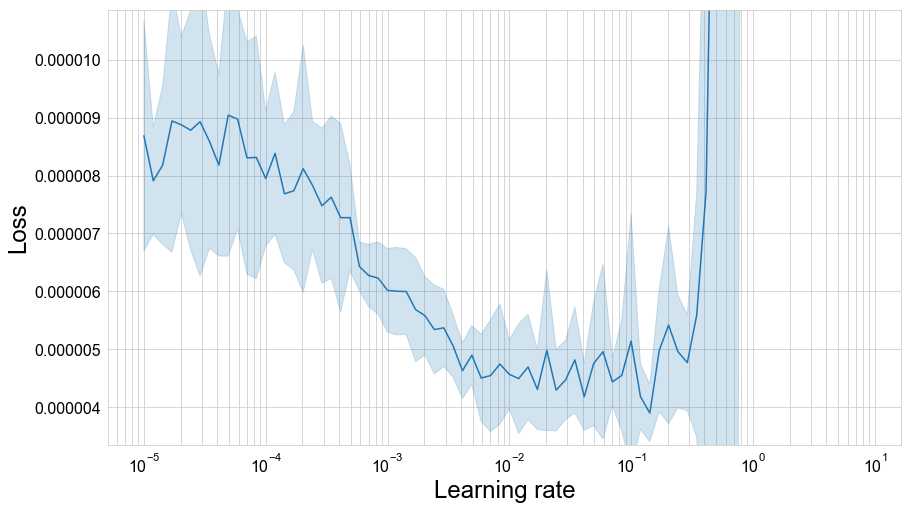

In [7]:
lr_finder = fold_lr_find(train_fy, model_builder, 256, lr_bounds=[1e-5,1e1])

### Train classifier

In [8]:
model_builder.set_lr(2e-3)
callback_partials = []
eval_metrics = {'AMS':AMS(n_total=250000, br=10, wgt_name='gen_weight_original')}

Training model 1 / 10, Val ID = 0


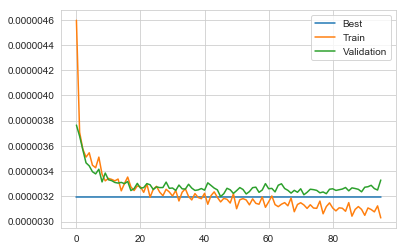

Early stopping after 96 epochs
Scores are: {'loss': 3.1976421723811654e-06, 'AMS': 3.7837949133202935}
Fold took 36.357s

Training model 2 / 10, Val ID = 1


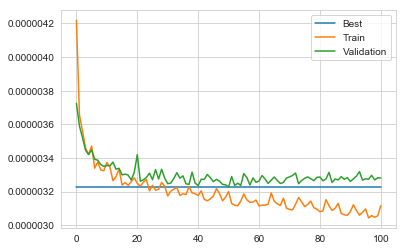

Early stopping after 101 epochs
Scores are: {'loss': 3.2266691505355993e-06, 'AMS': 3.950045280729164}
Fold took 38.164s

Training model 3 / 10, Val ID = 2


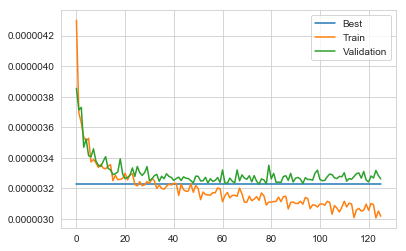

Early stopping after 126 epochs
Scores are: {'loss': 3.227514980608248e-06, 'AMS': 3.477220776662991}
Fold took 45.719s

Training model 4 / 10, Val ID = 3


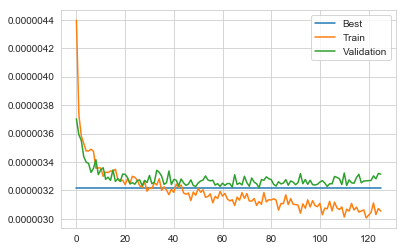

Early stopping after 126 epochs
Scores are: {'loss': 3.2193395327340113e-06, 'AMS': 3.9536168482123997}
Fold took 45.958s

Training model 5 / 10, Val ID = 4


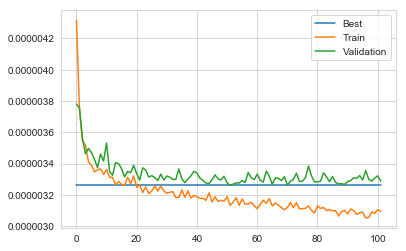

Early stopping after 102 epochs
Scores are: {'loss': 3.2626287520542974e-06, 'AMS': 3.3448159166731464}
Fold took 37.616s

Training model 6 / 10, Val ID = 5


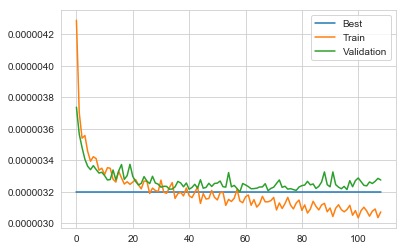

Early stopping after 109 epochs
Scores are: {'loss': 3.1997280984796816e-06, 'AMS': 3.7192258897660175}
Fold took 39.440s

Training model 7 / 10, Val ID = 6


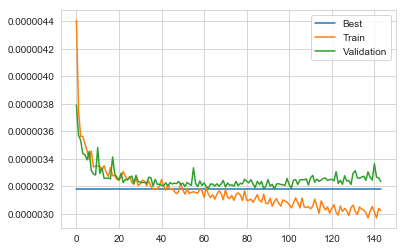

Early stopping after 144 epochs
Scores are: {'loss': 3.1797937936062226e-06, 'AMS': 4.0021682727562355}
Fold took 53.132s

Training model 8 / 10, Val ID = 7


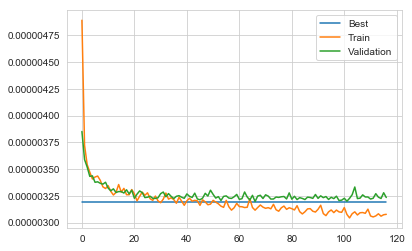

Early stopping after 117 epochs
Scores are: {'loss': 3.1969880183169153e-06, 'AMS': 3.682017244949998}
Fold took 43.450s

Training model 9 / 10, Val ID = 8


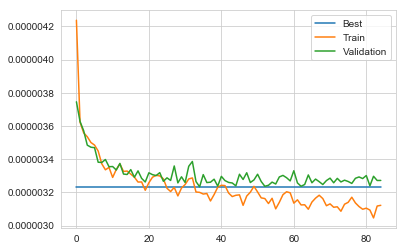

Early stopping after 85 epochs
Scores are: {'loss': 3.233785719203297e-06, 'AMS': 3.7615148551695}
Fold took 30.704s

Training model 10 / 10, Val ID = 9


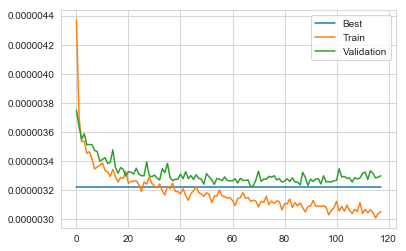

Early stopping after 118 epochs
Scores are: {'loss': 3.2213263239100343e-06, 'AMS': 3.9137269003280513}
Fold took 43.272s


______________________________________
Training finished
Cross-validation took 413.817s 


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

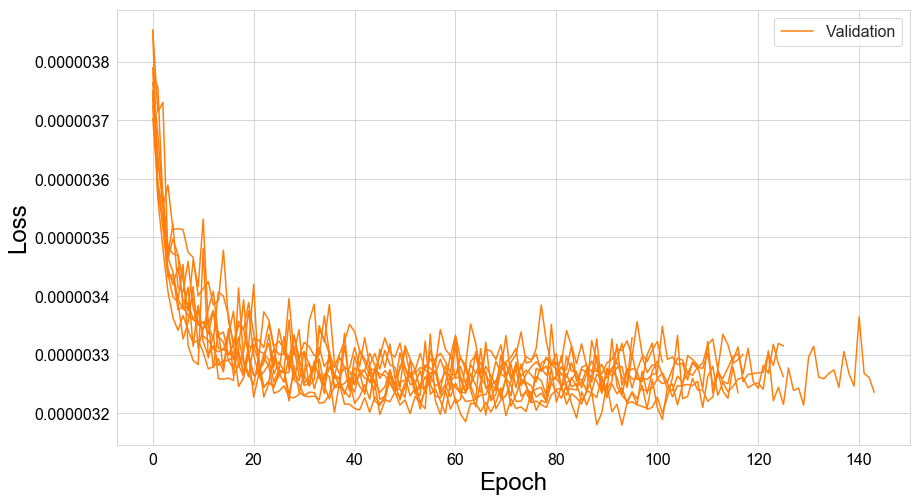

Mean loss = 3.217e-06±7e-09
Mean AMS = 3.76±0.06
______________________________________



In [9]:
train_timer = timeit.default_timer()
results, histories, cycle_losses = fold_train_ensemble(train_fy, n_models,
                                                       model_builder=model_builder,
                                                       bs=bs,
                                                       callback_partials=callback_partials,
                                                       eval_metrics=eval_metrics,
                                                       max_epochs=max_epochs, patience=patience)
train_time = timeit.default_timer()-train_timer
experiment['train_time'] = train_time

## Inference

### Construct ensemble

In [10]:
with open('train_weights/results_file.pkl', 'rb') as fin:   
    results = pickle.load(fin)
with open('train_weights/cycle_file.pkl', 'rb') as fin:   
    cycle_losses = pickle.load(fin)

In [11]:
ensemble = Ensemble.from_results(results, ensemble_size, model_builder, metric='loss', higher_metric_better=False)

Choosing ensemble by loss


Model 0 is 6 with loss = 3.1797937936062226e-06
Model 1 is 7 with loss = 3.1969880183169153e-06
Model 2 is 0 with loss = 3.1976421723811654e-06
Model 3 is 5 with loss = 3.1997280984796816e-06
Model 4 is 3 with loss = 3.2193395327340113e-06
Model 5 is 9 with loss = 3.2213263239100343e-06
Model 6 is 1 with loss = 3.2266691505355993e-06
Model 7 is 2 with loss = 3.227514980608248e-06
Model 8 is 8 with loss = 3.233785719203297e-06
Model 9 is 4 with loss = 3.2626287520542974e-06


### Validation

#### Response on validation data

In [12]:
val_fy = FoldYielder(DATA_PATH/'val.hdf5')

In [13]:
val_timer = timeit.default_timer()
ensemble.predict(val_fy)
val_time = timeit.default_timer()-val_timer
experiment['val_time'] = val_time

Mean time per event = 2.01e-06±4e-08


In [14]:
val_df = val_fy.get_df()

50000 datapoints loaded


Mean cut at 0.9348527193069458 corresponds to AMS of 3.695775191802117
Maximum AMS for data is 3.746613386359916 at cut of 0.9463858008384705


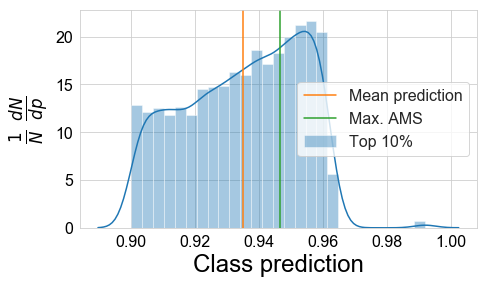

In [15]:
cut, experiment['val_ams_smooth'], experiment['val_ams_max'] = binary_class_cut_by_ams(val_df, top_perc=10, br=10, wgt_factor=250000/50000)

### Testing

#### Test scoring 

In [16]:
test_fy = FoldYielder(DATA_PATH/'test.hdf5')

In [17]:
test_timer = timeit.default_timer()
ensemble.predict(test_fy)
test_time = timeit.default_timer()-test_timer
experiment['test_time'] = test_time

Mean time per event = 8.3e-07±2e-08


In [18]:
experiment['test_public_ams_mean'], experiment['test_private_ams_mean'] = score_test_data_per_fold(test_fy, cut, pred_name='pred')

Mean Public:Private AMS: 3.73±0.08 : 3.7±0.03


In [19]:
experiment['test_public_ams'], experiment['test_private_ams'] = score_test_data(test_fy, cut, pred_name='pred')

Public:Private AMS: 3.720337053680775 : 3.696533119400931


## Results 

In [20]:
experiment

Experiment:	3_relu_ensemble_embed_fix
Machine:	helios_cuda
Device:	Nvidia GeForce GTX 1080 Ti GPU
train_time	414.2075240109998
val_time	0.10682747499959078
val_ams_smooth	3.695775191802117
val_ams_max	3.746613386359916
test_time	0.4654224649993921
test_public_ams_mean	(3.731635021436099, 0.08474033271493997)
test_private_ams_mean	(3.7002439125201505, 0.03119447712337013)
test_public_ams	3.720337053680775
test_private_ams	3.696533119400931

In [21]:
experiment.save()